In [403]:
# Importing Pandas, a data processing and CSV file I/O libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib.
%matplotlib inline
import pathlib
from datetime import datetime
import math
import sys

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import xgboost as xg

%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import shap as shap


In [404]:
df = pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/research/data/8-feat-eng/feat-lag.csv')

df_base = pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/research/data/9-basic-feat/feat-basic.csv')
df.head()

,Unnamed: 0,index,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,daily_demand,hmdxx,temp_min,temp_max,temp_mean,temp_median,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,dew_point_temp_median,rel_hum_min,rel_hum_max,rel_hum_mean,rel_hum_median,visibility_min,visibility_max,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median,week_of_year,day_of_week,year,month,day,temp_roll_mean,temp_roll_std,rel_hum_roll_mean,rel_hum_roll_std,rel_hum_lag_1,wind_speed_lag_1,rel_hum_lag_2,wind_speed_lag_2,rel_hum_lag_3,wind_speed_lag_3,rel_hum_lag_4,wind_speed_lag_4,rel_hum_lag_5,wind_speed_lag_5,rel_hum_lag_6,wind_speed_lag_6,rel_hum_lag_7,wind_speed_lag_7,temp_humidity_interaction,temp_wind_speed_interaction
0,0,0,0.575000,-1.387500,87.000000,20.333333,17.841667,99.075833,-5.888889,14655.208333,-1.884900,-1.8,2.8,0.575000,0.65,-4.8,1.1,-1.387500,-0.65,73.0,99.0,87.000000,86.5,0.8,40.2,17.841667,16.1,98.51,99.91,99.075833,98.840,-4.976663,0.686009,-1.884900,-1.513575,1,3,1970,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.025000,11.691667
1,1,1,-8.704167,-12.445833,74.416667,17.875000,28.387500,99.920000,-16.681818,15783.333333,-12.827363,-14.3,1.7,-8.704167,-9.90,-20.3,0.5,-12.445833,-13.90,60.0,92.0,74.416667,75.5,6.4,40.2,28.387500,25.0,98.77,100.51,99.920000,100.125,-19.165499,-0.338394,-12.827363,-14.393998,1,3,1970,1,1,NaN,NaN,NaN,NaN,87.000000,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-647.735069,-155.586979
2,2,2,-12.612500,-15.820833,77.250000,17.666667,10.404167,100.057083,-20.583333,18992.708333,-17.143932,-16.3,-10.3,-12.612500,-12.00,-23.2,-12.6,-15.820833,-15.00,55.0,91.0,77.250000,80.5,1.2,25.0,10.404167,8.0,99.41,100.47,100.057083,100.155,-21.317386,-14.555717,-17.143932,-16.423198,1,3,1970,1,1,NaN,NaN,NaN,NaN,74.416667,17.875000,87.000000,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-974.315625,-222.820833
3,3,3,-9.833333,-13.570833,74.416667,25.791667,24.879167,98.675417,-18.541667,19080.708333,-14.183286,-11.5,-7.4,-9.833333,-9.95,-15.0,-11.5,-13.570833,-13.70,57.0,84.0,74.416667,76.0,9.7,40.2,24.879167,24.1,98.27,99.34,98.675417,98.610,-15.874948,-11.706660,-14.183286,-14.310177,1,3,1970,1,1,NaN,NaN,NaN,NaN,77.250000,17.666667,74.416667,17.875000,87.000000,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-731.763889,-253.618056
4,4,4,-11.866667,-16.154167,70.791667,22.875000,27.033333,99.352083,-20.521739,19183.208333,-16.407695,-17.5,-7.2,-11.866667,-11.75,-20.8,-10.7,-16.154167,-17.00,56.0,84.0,70.791667,74.0,1.0,40.2,27.033333,25.0,98.44,100.37,99.352083,99.375,-22.394182,-11.256395,-16.407695,-16.464188,1,3,1970,1,1,NaN,NaN,NaN,NaN,74.416667,25.791667,77.250000,17.666667,74.416667,17.875000,87.0,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,-840.061111,-271.450000


In [405]:
df.dropna(inplace=True)

In [406]:
df.head()

,Unnamed: 0,index,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,daily_demand,hmdxx,temp_min,temp_max,temp_mean,temp_median,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,dew_point_temp_median,rel_hum_min,rel_hum_max,rel_hum_mean,rel_hum_median,visibility_min,visibility_max,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median,week_of_year,day_of_week,year,month,day,temp_roll_mean,temp_roll_std,rel_hum_roll_mean,rel_hum_roll_std,rel_hum_lag_1,wind_speed_lag_1,rel_hum_lag_2,wind_speed_lag_2,rel_hum_lag_3,wind_speed_lag_3,rel_hum_lag_4,wind_speed_lag_4,rel_hum_lag_5,wind_speed_lag_5,rel_hum_lag_6,wind_speed_lag_6,rel_hum_lag_7,wind_speed_lag_7,temp_humidity_interaction,temp_wind_speed_interaction
7,7,7,-13.225000,-15.316667,84.333333,16.041667,10.654167,99.271667,-20.541667,18435.000000,-17.718462,-15.0,-9.5,-13.225000,-14.10,-17.8,-10.7,-15.316667,-16.45,78.0,92.0,84.333333,84.0,1.6,25.0,10.654167,9.7,98.97,99.81,99.271667,99.190,-19.704437,-13.544552,-17.718462,-18.662419,1,3,1970,1,1,-12.523214,2.684410,77.184524,4.508663,78.208333,22.708333,80.875000,22.250000,70.791667,22.875000,74.416667,25.791667,77.250000,17.666667,74.416667,17.875000,87.000000,20.333333,-1115.308333,-212.151042
8,8,8,-17.804167,-22.325000,68.083333,7.666667,31.295833,100.806667,-25.058824,18043.750000,-22.771558,-21.8,-12.2,-17.804167,-18.50,-26.3,-17.6,-22.325000,-22.40,56.0,76.0,68.083333,69.5,24.1,40.2,31.295833,25.0,99.91,101.71,100.806667,100.840,-26.945633,-17.004725,-22.771558,-23.458662,1,3,1970,1,1,-13.823214,2.729764,76.279762,5.648137,84.333333,16.041667,78.208333,22.708333,80.875000,22.250000,70.791667,22.875000,74.416667,25.791667,77.250000,17.666667,74.416667,17.875000,-1212.167014,-136.498611
9,9,9,-14.858333,-18.841667,71.916667,10.750000,20.783333,101.655000,-20.904762,19717.916667,-19.501955,-24.8,-5.2,-14.858333,-15.60,-30.1,-9.1,-18.841667,-20.00,56.0,93.0,71.916667,71.5,4.0,25.0,20.783333,25.0,100.67,102.07,101.655000,101.810,-30.064700,-9.069644,-19.501955,-20.441878,1,3,1970,1,1,-14.144048,2.695514,75.517857,5.851502,68.083333,7.666667,84.333333,16.041667,78.208333,22.708333,80.875000,22.250000,70.791667,22.875000,74.416667,25.791667,77.250000,17.666667,-1068.561806,-159.727083
10,10,10,-2.879167,-5.737500,80.791667,16.041667,14.887500,100.441250,-9.352941,18584.291667,-6.155133,-10.0,1.3,-2.879167,-3.05,-13.4,-1.4,-5.737500,-4.95,69.0,94.0,80.791667,81.5,3.2,25.0,14.887500,14.5,100.17,100.84,100.441250,100.390,-14.326526,-1.410459,-6.155133,-6.322421,1,3,1970,1,1,-13.150595,4.915985,76.428571,6.140509,71.916667,10.750000,68.083333,7.666667,84.333333,16.041667,78.208333,22.708333,80.875000,22.250000,70.791667,22.875000,74.416667,25.791667,-232.612674,-46.186632
11,11,11,-7.758333,-9.816667,85.291667,9.250000,17.291667,99.892083,-11.894737,18506.250000,-11.569206,-16.1,-0.7,-7.758333,-7.20,-17.3,-1.8,-9.816667,-9.60,73.0,93.0,85.291667,86.0,6.4,25.0,17.291667,16.1,98.87,100.77,99.892083,100.025,-20.768405,-3.281749,-11.569206,-11.104928,1,3,1970,1,1,-12.563690,5.323192,78.500000,6.363688,80.791667,16.041667,71.916667,10.750000,68.083333,7.666667,84.333333,16.041667,78.208333,22.708333,80.875000,22.250000,70.791667,22.875000,-661.721181,-71.764583


dropping all demand related extra features and creating new features on weather data only

In [407]:
df.columns

Index(['Unnamed: 0', 'index', 'temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'visibility', 'press', 'wind_chill', 'daily_demand', 'hmdxx', 'temp_min', 'temp_max', 'temp_mean', 'temp_median', 'dew_point_temp_min', 'dew_point_temp_max', 'dew_point_temp_mean', 'dew_point_temp_median', 'rel_hum_min', 'rel_hum_max', 'rel_hum_mean', 'rel_hum_median', 'visibility_min', 'visibility_max', 'visibility_mean', 'visibility_median', 'press_min', 'press_max', 'press_mean', 'press_median', 'hmdxx_min', 'hmdxx_max', 'hmdxx_mean', 'hmdxx_median', 'week_of_year', 'day_of_week', 'year', 'month', 'day', 'temp_roll_mean', 'temp_roll_std', 'rel_hum_roll_mean', 'rel_hum_roll_std', 'rel_hum_lag_1', 'wind_speed_lag_1', 'rel_hum_lag_2', 'wind_speed_lag_2', 'rel_hum_lag_3', 'wind_speed_lag_3', 'rel_hum_lag_4', 'wind_speed_lag_4', 'rel_hum_lag_5', 'wind_speed_lag_5', 'rel_hum_lag_6', 'wind_speed_lag_6', 'rel_hum_lag_7', 'wind_speed_lag_7', 'temp_humidity_interaction', 'temp_wind_speed_interaction'], dtype='obj

In [408]:
# df.drop(columns=['temp_roll_mean', 'temp_roll_std', 'rel_hum_roll_mean', 'rel_hum_roll_std', 'rel_hum_lag_1', 'wind_speed_lag_1', 'rel_hum_lag_2', 'wind_speed_lag_2', 'rel_hum_lag_3', 'wind_speed_lag_3', 'rel_hum_lag_4', 'wind_speed_lag_4', 'rel_hum_lag_5', 'wind_speed_lag_5', 'rel_hum_lag_6', 'wind_speed_lag_6', 'rel_hum_lag_7', 'wind_speed_lag_7', 'temp_humidity_interaction', 'temp_wind_speed_interaction'], inplace=True)


In [409]:
df.columns

Index(['Unnamed: 0', 'index', 'temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'visibility', 'press', 'wind_chill', 'daily_demand', 'hmdxx', 'temp_min', 'temp_max', 'temp_mean', 'temp_median', 'dew_point_temp_min', 'dew_point_temp_max', 'dew_point_temp_mean', 'dew_point_temp_median', 'rel_hum_min', 'rel_hum_max', 'rel_hum_mean', 'rel_hum_median', 'visibility_min', 'visibility_max', 'visibility_mean', 'visibility_median', 'press_min', 'press_max', 'press_mean', 'press_median', 'hmdxx_min', 'hmdxx_max', 'hmdxx_mean', 'hmdxx_median', 'week_of_year', 'day_of_week', 'year', 'month', 'day', 'temp_roll_mean', 'temp_roll_std', 'rel_hum_roll_mean', 'rel_hum_roll_std', 'rel_hum_lag_1', 'wind_speed_lag_1', 'rel_hum_lag_2', 'wind_speed_lag_2', 'rel_hum_lag_3', 'wind_speed_lag_3', 'rel_hum_lag_4', 'wind_speed_lag_4', 'rel_hum_lag_5', 'wind_speed_lag_5', 'rel_hum_lag_6', 'wind_speed_lag_6', 'rel_hum_lag_7', 'wind_speed_lag_7', 'temp_humidity_interaction', 'temp_wind_speed_interaction'], dtype='obj

In [410]:
df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

In [411]:
df.head()

,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,daily_demand,hmdxx,temp_min,temp_max,temp_mean,temp_median,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,dew_point_temp_median,rel_hum_min,rel_hum_max,rel_hum_mean,rel_hum_median,visibility_min,visibility_max,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median,week_of_year,day_of_week,year,month,day,temp_roll_mean,temp_roll_std,rel_hum_roll_mean,rel_hum_roll_std,rel_hum_lag_1,wind_speed_lag_1,rel_hum_lag_2,wind_speed_lag_2,rel_hum_lag_3,wind_speed_lag_3,rel_hum_lag_4,wind_speed_lag_4,rel_hum_lag_5,wind_speed_lag_5,rel_hum_lag_6,wind_speed_lag_6,rel_hum_lag_7,wind_speed_lag_7,temp_humidity_interaction,temp_wind_speed_interaction
7,-13.225000,-15.316667,84.333333,16.041667,10.654167,99.271667,-20.541667,18435.000000,-17.718462,-15.0,-9.5,-13.225000,-14.10,-17.8,-10.7,-15.316667,-16.45,78.0,92.0,84.333333,84.0,1.6,25.0,10.654167,9.7,98.97,99.81,99.271667,99.190,-19.704437,-13.544552,-17.718462,-18.662419,1,3,1970,1,1,-12.523214,2.684410,77.184524,4.508663,78.208333,22.708333,80.875000,22.250000,70.791667,22.875000,74.416667,25.791667,77.250000,17.666667,74.416667,17.875000,87.000000,20.333333,-1115.308333,-212.151042
8,-17.804167,-22.325000,68.083333,7.666667,31.295833,100.806667,-25.058824,18043.750000,-22.771558,-21.8,-12.2,-17.804167,-18.50,-26.3,-17.6,-22.325000,-22.40,56.0,76.0,68.083333,69.5,24.1,40.2,31.295833,25.0,99.91,101.71,100.806667,100.840,-26.945633,-17.004725,-22.771558,-23.458662,1,3,1970,1,1,-13.823214,2.729764,76.279762,5.648137,84.333333,16.041667,78.208333,22.708333,80.875000,22.250000,70.791667,22.875000,74.416667,25.791667,77.250000,17.666667,74.416667,17.875000,-1212.167014,-136.498611
9,-14.858333,-18.841667,71.916667,10.750000,20.783333,101.655000,-20.904762,19717.916667,-19.501955,-24.8,-5.2,-14.858333,-15.60,-30.1,-9.1,-18.841667,-20.00,56.0,93.0,71.916667,71.5,4.0,25.0,20.783333,25.0,100.67,102.07,101.655000,101.810,-30.064700,-9.069644,-19.501955,-20.441878,1,3,1970,1,1,-14.144048,2.695514,75.517857,5.851502,68.083333,7.666667,84.333333,16.041667,78.208333,22.708333,80.875000,22.250000,70.791667,22.875000,74.416667,25.791667,77.250000,17.666667,-1068.561806,-159.727083
10,-2.879167,-5.737500,80.791667,16.041667,14.887500,100.441250,-9.352941,18584.291667,-6.155133,-10.0,1.3,-2.879167,-3.05,-13.4,-1.4,-5.737500,-4.95,69.0,94.0,80.791667,81.5,3.2,25.0,14.887500,14.5,100.17,100.84,100.441250,100.390,-14.326526,-1.410459,-6.155133,-6.322421,1,3,1970,1,1,-13.150595,4.915985,76.428571,6.140509,71.916667,10.750000,68.083333,7.666667,84.333333,16.041667,78.208333,22.708333,80.875000,22.250000,70.791667,22.875000,74.416667,25.791667,-232.612674,-46.186632
11,-7.758333,-9.816667,85.291667,9.250000,17.291667,99.892083,-11.894737,18506.250000,-11.569206,-16.1,-0.7,-7.758333,-7.20,-17.3,-1.8,-9.816667,-9.60,73.0,93.0,85.291667,86.0,6.4,25.0,17.291667,16.1,98.87,100.77,99.892083,100.025,-20.768405,-3.281749,-11.569206,-11.104928,1,3,1970,1,1,-12.563690,5.323192,78.500000,6.363688,80.791667,16.041667,71.916667,10.750000,68.083333,7.666667,84.333333,16.041667,78.208333,22.708333,80.875000,22.250000,70.791667,22.875000,-661.721181,-71.764583


In [412]:
x = df.loc[:, df.columns != 'daily_demand'].values
y = df.loc[:, 'daily_demand'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [413]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)

xgb_r.fit(x_train, y_train) 

pred = xgb_r.predict(x_test) 

In [414]:
r_sq = metrics.r2_score(y_test,pred)

print(r_sq)

0.4068247946499345


In [415]:
explainer = shap.TreeExplainer(xgb_r)
shap_values = explainer.shap_values(x_train)

In [416]:
df.columns

Index(['temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'visibility', 'press', 'wind_chill', 'daily_demand', 'hmdxx', 'temp_min', 'temp_max', 'temp_mean', 'temp_median', 'dew_point_temp_min', 'dew_point_temp_max', 'dew_point_temp_mean', 'dew_point_temp_median', 'rel_hum_min', 'rel_hum_max', 'rel_hum_mean', 'rel_hum_median', 'visibility_min', 'visibility_max', 'visibility_mean', 'visibility_median', 'press_min', 'press_max', 'press_mean', 'press_median', 'hmdxx_min', 'hmdxx_max', 'hmdxx_mean', 'hmdxx_median', 'week_of_year', 'day_of_week', 'year', 'month', 'day', 'temp_roll_mean', 'temp_roll_std', 'rel_hum_roll_mean', 'rel_hum_roll_std', 'rel_hum_lag_1', 'wind_speed_lag_1', 'rel_hum_lag_2', 'wind_speed_lag_2', 'rel_hum_lag_3', 'wind_speed_lag_3', 'rel_hum_lag_4', 'wind_speed_lag_4', 'rel_hum_lag_5', 'wind_speed_lag_5', 'rel_hum_lag_6', 'wind_speed_lag_6', 'rel_hum_lag_7', 'wind_speed_lag_7', 'temp_humidity_interaction', 'temp_wind_speed_interaction'], dtype='object')

In [417]:
features = df.columns.values
# features = np.delete(features, 37)
features

array(['temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'visibility',
       'press', 'wind_chill', 'daily_demand', 'hmdxx', 'temp_min',
       'temp_max', 'temp_mean', 'temp_median', 'dew_point_temp_min',
       'dew_point_temp_max', 'dew_point_temp_mean',
       'dew_point_temp_median', 'rel_hum_min', 'rel_hum_max',
       'rel_hum_mean', 'rel_hum_median', 'visibility_min',
       'visibility_max', 'visibility_mean', 'visibility_median',
       'press_min', 'press_max', 'press_mean', 'press_median',
       'hmdxx_min', 'hmdxx_max', 'hmdxx_mean', 'hmdxx_median',
       'week_of_year', 'day_of_week', 'year', 'month', 'day',
       'temp_roll_mean', 'temp_roll_std', 'rel_hum_roll_mean',
       'rel_hum_roll_std', 'rel_hum_lag_1', 'wind_speed_lag_1',
       'rel_hum_lag_2', 'wind_speed_lag_2', 'rel_hum_lag_3',
       'wind_speed_lag_3', 'rel_hum_lag_4', 'wind_speed_lag_4',
       'rel_hum_lag_5', 'wind_speed_lag_5', 'rel_hum_lag_6',
       'wind_speed_lag_6', 'rel_hum_lag_7', 'wind_spe

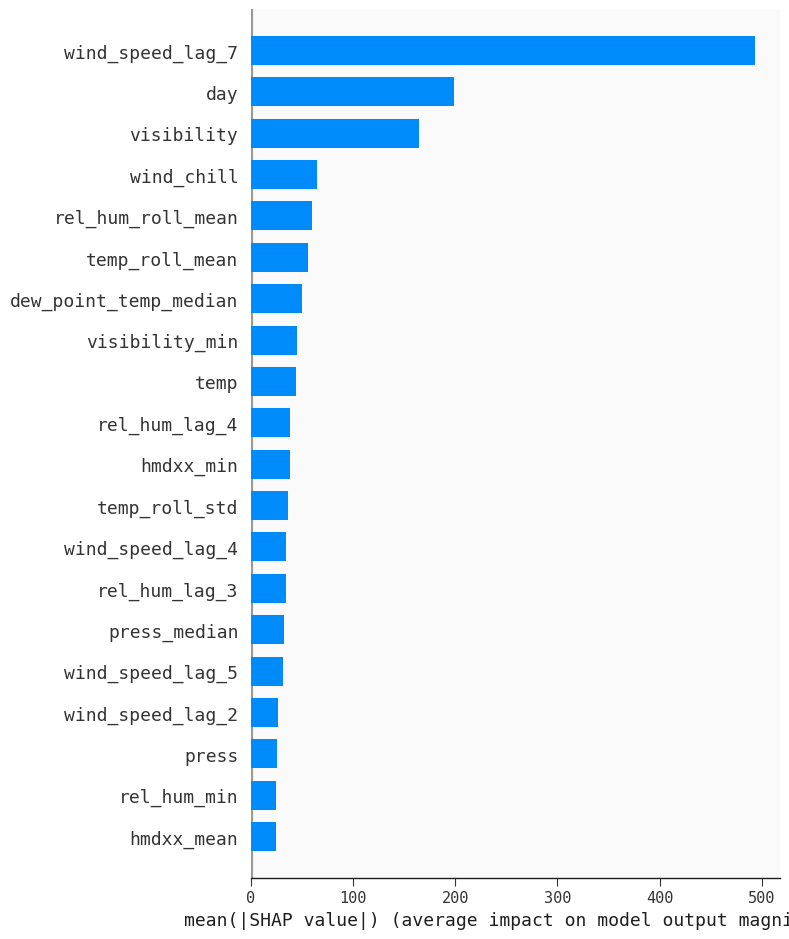

In [418]:
shap.summary_plot(shap_values, x_train, feature_names=features, plot_type="bar")

In [419]:
df_base = pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/research/data/9-basic-feat/feat-basic.csv')

df_base.head()

,Unnamed: 0,temp,dew_point_temp,rel_hum,visibility,press,daily_demand,hmdxx,year,month,day_of_week,week_of_year,sun_set
0,0,0.575000,-1.387500,87.000000,17.841667,99.075833,14655.208333,-1.884900,1994,1,5,52,17.0
1,1,-8.704167,-12.445833,74.416667,28.387500,99.920000,15783.333333,-12.827363,1994,1,6,52,17.0
2,2,-12.612500,-15.820833,77.250000,10.404167,100.057083,18992.708333,-17.143932,1994,1,0,1,17.0
3,3,-9.833333,-13.570833,74.416667,24.879167,98.675417,19080.708333,-14.183286,1994,1,1,1,17.0
4,4,-11.866667,-16.154167,70.791667,27.033333,99.352083,19183.208333,-16.407695,1994,1,2,1,17.0


In [420]:
df.head()

,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,daily_demand,hmdxx,temp_min,temp_max,temp_mean,temp_median,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,dew_point_temp_median,rel_hum_min,rel_hum_max,rel_hum_mean,rel_hum_median,visibility_min,visibility_max,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median,week_of_year,day_of_week,year,month,day,temp_roll_mean,temp_roll_std,rel_hum_roll_mean,rel_hum_roll_std,rel_hum_lag_1,wind_speed_lag_1,rel_hum_lag_2,wind_speed_lag_2,rel_hum_lag_3,wind_speed_lag_3,rel_hum_lag_4,wind_speed_lag_4,rel_hum_lag_5,wind_speed_lag_5,rel_hum_lag_6,wind_speed_lag_6,rel_hum_lag_7,wind_speed_lag_7,temp_humidity_interaction,temp_wind_speed_interaction
7,-13.225000,-15.316667,84.333333,16.041667,10.654167,99.271667,-20.541667,18435.000000,-17.718462,-15.0,-9.5,-13.225000,-14.10,-17.8,-10.7,-15.316667,-16.45,78.0,92.0,84.333333,84.0,1.6,25.0,10.654167,9.7,98.97,99.81,99.271667,99.190,-19.704437,-13.544552,-17.718462,-18.662419,1,3,1970,1,1,-12.523214,2.684410,77.184524,4.508663,78.208333,22.708333,80.875000,22.250000,70.791667,22.875000,74.416667,25.791667,77.250000,17.666667,74.416667,17.875000,87.000000,20.333333,-1115.308333,-212.151042
8,-17.804167,-22.325000,68.083333,7.666667,31.295833,100.806667,-25.058824,18043.750000,-22.771558,-21.8,-12.2,-17.804167,-18.50,-26.3,-17.6,-22.325000,-22.40,56.0,76.0,68.083333,69.5,24.1,40.2,31.295833,25.0,99.91,101.71,100.806667,100.840,-26.945633,-17.004725,-22.771558,-23.458662,1,3,1970,1,1,-13.823214,2.729764,76.279762,5.648137,84.333333,16.041667,78.208333,22.708333,80.875000,22.250000,70.791667,22.875000,74.416667,25.791667,77.250000,17.666667,74.416667,17.875000,-1212.167014,-136.498611
9,-14.858333,-18.841667,71.916667,10.750000,20.783333,101.655000,-20.904762,19717.916667,-19.501955,-24.8,-5.2,-14.858333,-15.60,-30.1,-9.1,-18.841667,-20.00,56.0,93.0,71.916667,71.5,4.0,25.0,20.783333,25.0,100.67,102.07,101.655000,101.810,-30.064700,-9.069644,-19.501955,-20.441878,1,3,1970,1,1,-14.144048,2.695514,75.517857,5.851502,68.083333,7.666667,84.333333,16.041667,78.208333,22.708333,80.875000,22.250000,70.791667,22.875000,74.416667,25.791667,77.250000,17.666667,-1068.561806,-159.727083
10,-2.879167,-5.737500,80.791667,16.041667,14.887500,100.441250,-9.352941,18584.291667,-6.155133,-10.0,1.3,-2.879167,-3.05,-13.4,-1.4,-5.737500,-4.95,69.0,94.0,80.791667,81.5,3.2,25.0,14.887500,14.5,100.17,100.84,100.441250,100.390,-14.326526,-1.410459,-6.155133,-6.322421,1,3,1970,1,1,-13.150595,4.915985,76.428571,6.140509,71.916667,10.750000,68.083333,7.666667,84.333333,16.041667,78.208333,22.708333,80.875000,22.250000,70.791667,22.875000,74.416667,25.791667,-232.612674,-46.186632
11,-7.758333,-9.816667,85.291667,9.250000,17.291667,99.892083,-11.894737,18506.250000,-11.569206,-16.1,-0.7,-7.758333,-7.20,-17.3,-1.8,-9.816667,-9.60,73.0,93.0,85.291667,86.0,6.4,25.0,17.291667,16.1,98.87,100.77,99.892083,100.025,-20.768405,-3.281749,-11.569206,-11.104928,1,3,1970,1,1,-12.563690,5.323192,78.500000,6.363688,80.791667,16.041667,71.916667,10.750000,68.083333,7.666667,84.333333,16.041667,78.208333,22.708333,80.875000,22.250000,70.791667,22.875000,-661.721181,-71.764583


In [421]:
df_base.drop(columns='Unnamed: 0', inplace=True)

In [422]:
# window_size = 7
# df_base['temp_roll_mean'] = df_base['temp'].rolling(window=window_size).mean()
# df_base['temp_roll_std'] = df_base['temp'].rolling(window=window_size).std()

In [423]:
# for lag in range(1, 3):
#   df_base[f'temp_lag_{lag}'] = df_base['temp'].shift(lag)

In [424]:
df_base.dropna(inplace=True)

In [425]:
x = df_base.loc[:, df_base.columns != 'daily_demand'].values
y = df_base.loc[:, 'daily_demand'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [426]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)

xgb_r.fit(x_train, y_train) 

pred = xgb_r.predict(x_test) 

In [427]:
r_sq = metrics.r2_score(y_test,pred)

print(r_sq)

0.9086126087508187


In [428]:
explainer = shap.TreeExplainer(xgb_r)
shap_values = explainer.shap_values(x_train)

In [429]:
features = df_base.columns.values
# features = np.delete(features, 37)
features

array(['temp', 'dew_point_temp', 'rel_hum', 'visibility', 'press',
       'daily_demand', 'hmdxx', 'year', 'month', 'day_of_week',
       'week_of_year', 'sun_set'], dtype=object)

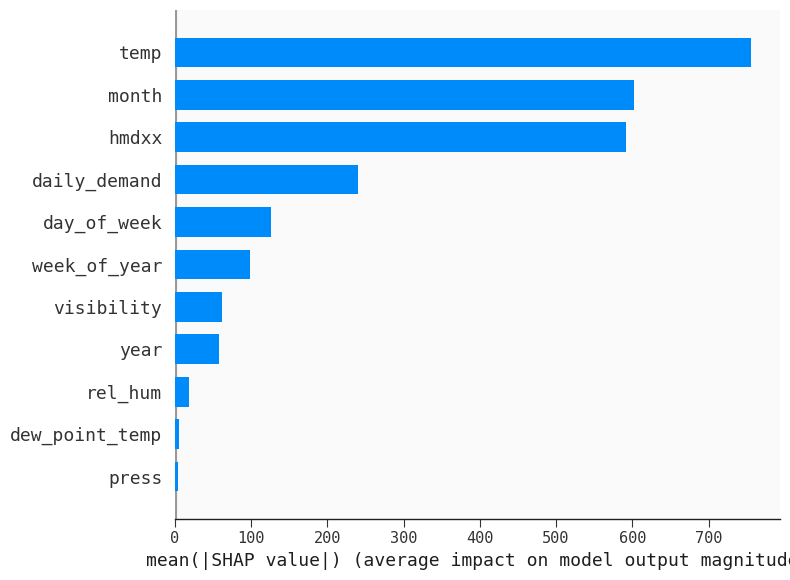

In [430]:
shap.summary_plot(shap_values, x_train, feature_names=features, plot_type="bar")

In [309]:
from sklearn.ensemble import RandomForestRegressor

In [310]:
X = df_base.loc[:, df_base.columns != 'daily_demand'].values
y = df_base.loc[:, 'daily_demand'].values


In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [312]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [313]:
rf_regressor.fit(X_train, y_train)
# rf_regressor.fit(X_train.drop(columns=['date', 'year', 'month', 'day']), y_train)




RandomForestRegressor(random_state=42)

In [314]:
y_pred = rf_regressor.predict(X_test)


In [315]:
r_sq = metrics.r2_score(y_test,y_pred)
print(f"R^2 Score: {r_sq}")

R^2 Score: 0.911118681130471


In [316]:
import feyn

In [317]:
x = df_base.loc[:, df_base.columns != 'daily_demand'].values
y = df_base.loc[:, 'daily_demand'].values

In [318]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [319]:
qtrain, qtest = feyn.tools.split(df, ratio=[0.6, 0.4], random_state=42)
qytest = qtest.loc[:, 'daily_demand'].values
qytest

array([17111.5       , 18378.04166667, 17100.70833333, ...,
       20836.08333333, 16784.20833333, 16325.45833333])

In [320]:
# Instantiate a QLattice
ql = feyn.QLattice(random_seed=42)

# Sample and fit models
qmodels = ql.auto_run(
    data=qtest,
    output_name='daily_demand'
)
best = qmodels[0]

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="308.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 771 308.0" width="771" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="215.0" width="591" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="481" y="80.0"><title>daily_demand
linear:
scale=4468.812500
scale offset=0.000000
w=1.748947
bias=1.5806</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="101.5">daily_de..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="89.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="483" y="89.0">out</text><line stroke="#1E1E1E" x1="451" x2="481" y1="97.5" y2="97.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="80.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="101.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="89.0">1</text><line stroke="#1E1E1E" x1="331" x2="361" y1="67.5" y2="88.5" /><line stroke="#1E1E1E" x1="331" x2="361" y1="127.5" y2="106.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="50.0"><title>tanh</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">tanh</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">2</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="20.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="41.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="29.0">3</text><line stroke="#1E1E1E" x1="91" x2="121" y1="67.5" y2="28.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="127.5" y2="46.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="50.0"><title>hmdxx
linear:
scale=0.049255
scale offset=-6.585493
w=0.430160
bias=0.7993</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="71.5">hmdxx</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="59.0">4</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="59.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="110.0"><title>rel_hum_mean
linear:
scale=0.028352
scale offset=70.493820
w=1.070607
bias=-0.0179</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="131.5">rel_hum_..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="119.0">5</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="119.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="110.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style
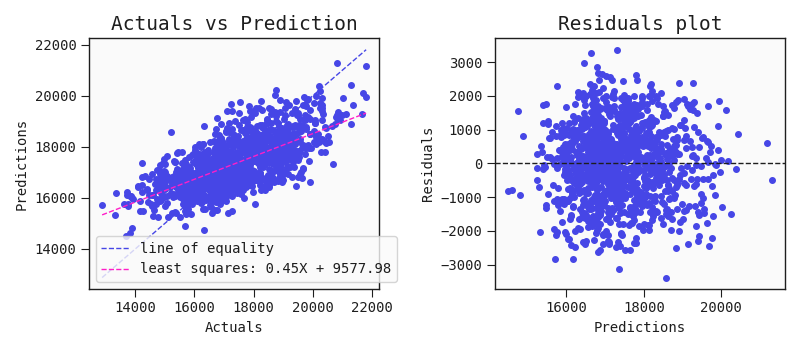

In [321]:
best.plot(qtest)

In [322]:
df_base = pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/research/data/9-basic-feat/feat-basic.csv')

In [323]:
df_base.head()

,Unnamed: 0,temp,dew_point_temp,rel_hum,visibility,press,daily_demand,hmdxx,year,month,day_of_week,week_of_year,sun_set
0,0,0.575000,-1.387500,87.000000,17.841667,99.075833,14655.208333,-1.884900,1994,1,5,52,17.0
1,1,-8.704167,-12.445833,74.416667,28.387500,99.920000,15783.333333,-12.827363,1994,1,6,52,17.0
2,2,-12.612500,-15.820833,77.250000,10.404167,100.057083,18992.708333,-17.143932,1994,1,0,1,17.0
3,3,-9.833333,-13.570833,74.416667,24.879167,98.675417,19080.708333,-14.183286,1994,1,1,1,17.0
4,4,-11.866667,-16.154167,70.791667,27.033333,99.352083,19183.208333,-16.407695,1994,1,2,1,17.0


In [324]:
df_base.drop(columns='Unnamed: 0', inplace=True)

In [325]:
df_base.head()

,temp,dew_point_temp,rel_hum,visibility,press,daily_demand,hmdxx,year,month,day_of_week,week_of_year,sun_set
0,0.575000,-1.387500,87.000000,17.841667,99.075833,14655.208333,-1.884900,1994,1,5,52,17.0
1,-8.704167,-12.445833,74.416667,28.387500,99.920000,15783.333333,-12.827363,1994,1,6,52,17.0
2,-12.612500,-15.820833,77.250000,10.404167,100.057083,18992.708333,-17.143932,1994,1,0,1,17.0
3,-9.833333,-13.570833,74.416667,24.879167,98.675417,19080.708333,-14.183286,1994,1,1,1,17.0
4,-11.866667,-16.154167,70.791667,27.033333,99.352083,19183.208333,-16.407695,1994,1,2,1,17.0


In [326]:
import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [328]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [329]:
scaler.fit(X_train)

MinMaxScaler()

In [330]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [331]:
model_params = {
    'objective': 'reg:squarederror',  # Assuming regression task
    'eval_metric': 'rmse',
    'max_depth': 5,
    'learning_rate': 0.1,
}

In [332]:
model = xgb.XGBRegressor(**model_params)


In [333]:
model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [334]:
y_pred = model.predict(X_test_scaled)


In [335]:
r_sq = metrics.r2_score(y_test,pred)

print(r_sq)

0.9086126087508187


In [336]:
explainer = shap.TreeExplainer(xgb_r)
shap_values = explainer.shap_values(X_train)

KeyboardInterrupt: 

In [ ]:
features = df_base.columns.values
# features = np.delete(features, 37)
features

array(['temp', 'dew_point_temp', 'rel_hum', 'visibility', 'press',
       'daily_demand', 'hmdxx', 'year', 'month', 'day_of_week',
       'week_of_year', 'sun_set'], dtype=object)

IndexError: index 12 is out of bounds for axis 0 with size 12

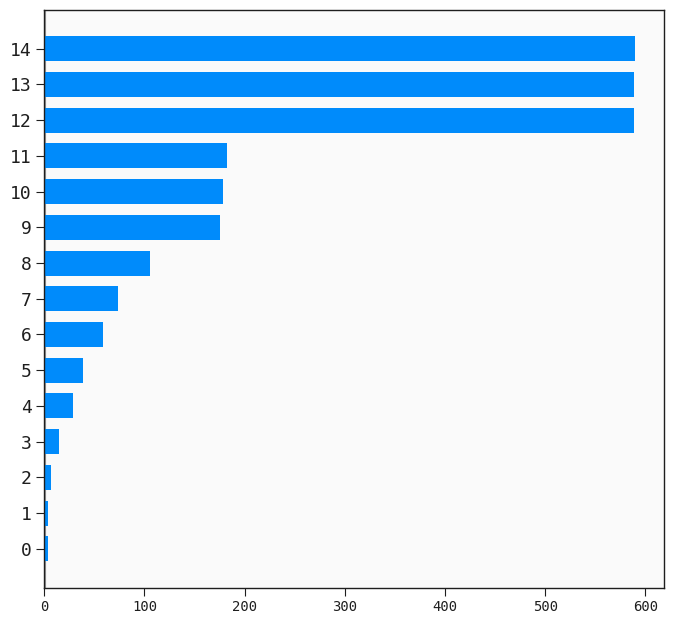

In [ ]:
shap.summary_plot(shap_values, X_train, feature_names=features, plot_type="bar")

# with daily data with min, max, mean, median

In [377]:
df_daily = pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/research/data/7-usable/1-daily_data.csv')

In [378]:
df_daily.head()

,Unnamed: 0,date,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,hourly_demand,hmdxx,temp_min,temp_max,temp_mean,temp_median,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,dew_point_temp_median,rel_hum_min,rel_hum_max,rel_hum_mean,rel_hum_median,visibility_min,visibility_max,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median
0,0,1994-01-01,0.575000,-1.387500,87.000000,20.333333,17.841667,99.075833,-5.888889,14655.208333,-1.884900,-1.8,2.8,0.575000,0.65,-4.8,1.1,-1.387500,-0.65,73.0,99.0,87.000000,86.5,0.8,40.2,17.841667,16.1,98.51,99.91,99.075833,98.840,-4.976663,0.686009,-1.884900,-1.513575
1,1,1994-01-02,-8.704167,-12.445833,74.416667,17.875000,28.387500,99.920000,-16.681818,15783.333333,-12.827363,-14.3,1.7,-8.704167,-9.90,-20.3,0.5,-12.445833,-13.90,60.0,92.0,74.416667,75.5,6.4,40.2,28.387500,25.0,98.77,100.51,99.920000,100.125,-19.165499,-0.338394,-12.827363,-14.393998
2,2,1994-01-03,-12.612500,-15.820833,77.250000,17.666667,10.404167,100.057083,-20.583333,18992.708333,-17.143932,-16.3,-10.3,-12.612500,-12.00,-23.2,-12.6,-15.820833,-15.00,55.0,91.0,77.250000,80.5,1.2,25.0,10.404167,8.0,99.41,100.47,100.057083,100.155,-21.317386,-14.555717,-17.143932,-16.423198
3,3,1994-01-04,-9.833333,-13.570833,74.416667,25.791667,24.879167,98.675417,-18.541667,19080.708333,-14.183286,-11.5,-7.4,-9.833333,-9.95,-15.0,-11.5,-13.570833,-13.70,57.0,84.0,74.416667,76.0,9.7,40.2,24.879167,24.1,98.27,99.34,98.675417,98.610,-15.874948,-11.706660,-14.183286,-14.310177
4,4,1994-01-05,-11.866667,-16.154167,70.791667,22.875000,27.033333,99.352083,-20.521739,19183.208333,-16.407695,-17.5,-7.2,-11.866667,-11.75,-20.8,-10.7,-16.154167,-17.00,56.0,84.0,70.791667,74.0,1.0,40.2,27.033333,25.0,98.44,100.37,99.352083,99.375,-22.394182,-11.256395,-16.407695,-16.464188


In [379]:
df_daily = df_daily.reset_index()


In [380]:
df_daily.columns


Index(['index', 'Unnamed: 0', 'date', 'temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'visibility', 'press', 'wind_chill', 'hourly_demand', 'hmdxx', 'temp_min', 'temp_max', 'temp_mean', 'temp_median', 'dew_point_temp_min', 'dew_point_temp_max', 'dew_point_temp_mean', 'dew_point_temp_median', 'rel_hum_min', 'rel_hum_max', 'rel_hum_mean', 'rel_hum_median', 'visibility_min', 'visibility_max', 'visibility_mean', 'visibility_median', 'press_min', 'press_max', 'press_mean', 'press_median', 'hmdxx_min', 'hmdxx_max', 'hmdxx_mean', 'hmdxx_median'], dtype='object')

In [381]:
df_daily.head()

,index,Unnamed: 0,date,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,hourly_demand,hmdxx,temp_min,temp_max,temp_mean,temp_median,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,dew_point_temp_median,rel_hum_min,rel_hum_max,rel_hum_mean,rel_hum_median,visibility_min,visibility_max,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median
0,0,0,1994-01-01,0.575000,-1.387500,87.000000,20.333333,17.841667,99.075833,-5.888889,14655.208333,-1.884900,-1.8,2.8,0.575000,0.65,-4.8,1.1,-1.387500,-0.65,73.0,99.0,87.000000,86.5,0.8,40.2,17.841667,16.1,98.51,99.91,99.075833,98.840,-4.976663,0.686009,-1.884900,-1.513575
1,1,1,1994-01-02,-8.704167,-12.445833,74.416667,17.875000,28.387500,99.920000,-16.681818,15783.333333,-12.827363,-14.3,1.7,-8.704167,-9.90,-20.3,0.5,-12.445833,-13.90,60.0,92.0,74.416667,75.5,6.4,40.2,28.387500,25.0,98.77,100.51,99.920000,100.125,-19.165499,-0.338394,-12.827363,-14.393998
2,2,2,1994-01-03,-12.612500,-15.820833,77.250000,17.666667,10.404167,100.057083,-20.583333,18992.708333,-17.143932,-16.3,-10.3,-12.612500,-12.00,-23.2,-12.6,-15.820833,-15.00,55.0,91.0,77.250000,80.5,1.2,25.0,10.404167,8.0,99.41,100.47,100.057083,100.155,-21.317386,-14.555717,-17.143932,-16.423198
3,3,3,1994-01-04,-9.833333,-13.570833,74.416667,25.791667,24.879167,98.675417,-18.541667,19080.708333,-14.183286,-11.5,-7.4,-9.833333,-9.95,-15.0,-11.5,-13.570833,-13.70,57.0,84.0,74.416667,76.0,9.7,40.2,24.879167,24.1,98.27,99.34,98.675417,98.610,-15.874948,-11.706660,-14.183286,-14.310177
4,4,4,1994-01-05,-11.866667,-16.154167,70.791667,22.875000,27.033333,99.352083,-20.521739,19183.208333,-16.407695,-17.5,-7.2,-11.866667,-11.75,-20.8,-10.7,-16.154167,-17.00,56.0,84.0,70.791667,74.0,1.0,40.2,27.033333,25.0,98.44,100.37,99.352083,99.375,-22.394182,-11.256395,-16.407695,-16.464188


In [382]:
df_daily['date'] = pd.to_datetime(df_daily['date'])

In [383]:
df_daily.set_index('date', inplace=True)

In [384]:
# df_daily['hour_of_day'] = df_daily.index.hour
df_daily['year'] = df_daily.index.year
df_daily['month'] = df_daily.index.month
df_daily['day_of_week'] = df_daily.index.dayofweek
df_daily['day_of_year'] = df_daily.index.dayofyear
# df_daily['week_of_year'] = df_daily.index.weekofyear
df_daily['week_of_year'] = df_daily.index.isocalendar().week

In [385]:
df_daily.columns

Index(['index', 'Unnamed: 0', 'temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'visibility', 'press', 'wind_chill', 'hourly_demand', 'hmdxx', 'temp_min', 'temp_max', 'temp_mean', 'temp_median', 'dew_point_temp_min', 'dew_point_temp_max', 'dew_point_temp_mean', 'dew_point_temp_median', 'rel_hum_min', 'rel_hum_max', 'rel_hum_mean', 'rel_hum_median', 'visibility_min', 'visibility_max', 'visibility_mean', 'visibility_median', 'press_min', 'press_max', 'press_mean', 'press_median', 'hmdxx_min', 'hmdxx_max', 'hmdxx_mean', 'hmdxx_median', 'year', 'month', 'day_of_week', 'day_of_year', 'week_of_year'], dtype='object')

In [386]:
df_daily.head()

,index,Unnamed: 0,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,hourly_demand,hmdxx,temp_min,temp_max,temp_mean,temp_median,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,dew_point_temp_median,rel_hum_min,rel_hum_max,rel_hum_mean,rel_hum_median,visibility_min,visibility_max,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median,year,month,day_of_week,day_of_year,week_of_year
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1994-01-01,0,0,0.575000,-1.387500,87.000000,20.333333,17.841667,99.075833,-5.888889,14655.208333,-1.884900,-1.8,2.8,0.575000,0.65,-4.8,1.1,-1.387500,-0.65,73.0,99.0,87.000000,86.5,0.8,40.2,17.841667,16.1,98.51,99.91,99.075833,98.840,-4.976663,0.686009,-1.884900,-1.513575,1994,1,5,1,52
1994-01-02,1,1,-8.704167,-12.445833,74.416667,17.875000,28.387500,99.920000,-16.681818,15783.333333,-12.827363,-14.3,1.7,-8.704167,-9.90,-20.3,0.5,-12.445833,-13.90,60.0,92.0,74.416667,75.5,6.4,40.2,28.387500,25.0,98.77,100.51,99.920000,100.125,-19.165499,-0.338394,-12.827363,-14.393998,1994,1,6,2,52
1994-01-03,2,2,-12.612500,-15.820833,77.250000,17.666667,10.404167,100.057083,-20.583333,18992.708333,-17.143932,-16.3,-10.3,-12.612500,-12.00,-23.2,-12.6,-15.820833,-15.00,55.0,91.0,77.250000,80.5,1.2,25.0,10.404167,8.0,99.41,100.47,100.057083,100.155,-21.317386,-14.555717,-17.143932,-16.423198,1994,1,0,3,1
1994-01-04,3,3,-9.833333,-13.570833,74.416667,25.791667,24.879167,98.675417,-18.541667,19080.708333,-14.183286,-11.5,-7.4,-9.833333,-9.95,-15.0,-11.5,-13.570833,-13.70,57.0,84.0,74.416667,76.0,9.7,40.2,24.879167,24.1,98.27,99.34,98.675417,98.610,-15.874948,-11.706660,-14.183286,-14.310177,1994,1,1,4,1
1994-01-05,4,4,-11.866667,-16.154167,70.791667,22.875000,27.033333,99.352083,-20.521739,19183.208333,-16.407695,-17.5,-7.2,-11.866667,-11.75,-20.8,-10.7,-16.154167,-17.00,56.0,84.0,70.791667,74.0,1.0,40.2,27.033333,25.0,98.44,100.37,99.352083,99.375,-22.394182,-11.256395,-16.407695,-16.464188,1994,1,2,5,1


In [387]:
df_daily.drop(columns=['Unnamed: 0', 'index', 'wind_chill'], inplace=True)

In [388]:
df_daily.shape

(9131, 37)

In [389]:
df_daily.replace([np.inf, -np.inf], np.nan, inplace=True)
df_daily = df_daily.dropna() 


In [390]:
df_daily.dropna()

,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,hourly_demand,hmdxx,temp_min,temp_max,temp_mean,temp_median,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,dew_point_temp_median,rel_hum_min,rel_hum_max,rel_hum_mean,rel_hum_median,visibility_min,visibility_max,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median,year,month,day_of_week,day_of_year,week_of_year
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1994-01-01,0.575000,-1.387500,87.000000,20.333333,17.841667,99.075833,14655.208333,-1.884900,-1.8,2.8,0.575000,0.65,-4.8,1.1,-1.387500,-0.65,73.0,99.0,87.000000,86.5,0.8,40.2,17.841667,16.1,98.51,99.91,99.075833,98.840,-4.976663,0.686009,-1.884900,-1.513575,1994,1,5,1,52
1994-01-02,-8.704167,-12.445833,74.416667,17.875000,28.387500,99.920000,15783.333333,-12.827363,-14.3,1.7,-8.704167,-9.90,-20.3,0.5,-12.445833,-13.90,60.0,92.0,74.416667,75.5,6.4,40.2,28.387500,25.0,98.77,100.51,99.920000,100.125,-19.165499,-0.338394,-12.827363,-14.393998,1994,1,6,2,52
1994-01-03,-12.612500,-15.820833,77.250000,17.666667,10.404167,100.057083,18992.708333,-17.143932,-16.3,-10.3,-12.612500,-12.00,-23.2,-12.6,-15.820833,-15.00,55.0,91.0,77.250000,80.5,1.2,25.0,10.404167,8.0,99.41,100.47,100.057083,100.155,-21.317386,-14.555717,-17.143932,-16.423198,1994,1,0,3,1
1994-01-04,-9.833333,-13.570833,74.416667,25.791667,24.879167,98.675417,19080.708333,-14.183286,-11.5,-7.4,-9.833333,-9.95,-15.0,-11.5,-13.570833,-13.70,57.0,84.0,74.416667,76.0,9.7,40.2,24.879167,24.1,98.27,99.34,98.675417,98.610,-15.874948,-11.706660,-14.183286,-14.310177,1994,1,1,4,1
1994-01-05,-11.866667,-16.154167,70.791667,22.875000,27.033333,99.352083,19183.208333,-16.407695,-17.5,-7.2,-11.866667,-11.75,-20.8,-10.7,-16.154167,-17.00,56.0,84.0,70.791667,74.0,1.0,40.2,27.033333,25.0,98.44,100.37,99.352083,99.375,-22.394182,-11.256395,-16.407695,-16.464188,1994,1,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,-2.541667,-6.575000,74.166667,17.750000,23.633333,100.791667,15698.625000,-5.917272,-6.9,2.5,-2.541667,-1.95,-12.7,0.0,-6.575000,-5.35,61.0,83.0,74.166667,77.0,12.9,24.1,23.633333,24.1,99.31,101.50,100.791667,101.075,-11.155717,0.336425,-5.917272,-5.212529,2018,12,3,361,52
2018-12-28,8.016667,6.254167,88.833333,15.750000,17.204167,98.661667,14809.208333,7.868511,2.7,12.4,8.016667,8.35,0.4,10.8,6.254167,7.25,74.0,95.0,88.833333,91.5,3.6,24.1,17.204167,24.1,98.37,99.21,98.661667,98.635,0.738694,13.912823,7.868511,8.262797,2018,12,4,362,52
2018-12-29,-2.525000,-7.520833,68.875000,19.916667,24.033333,99.903750,15135.791667,-6.063010,-7.0,3.6,-2.525000,-3.05,-11.4,-0.6,-7.520833,-9.35,56.0,80.0,68.875000,71.0,22.5,24.1,24.033333,24.1,98.85,100.43,99.903750,100.135,-11.125707,1.291505,-6.063010,-7.026121,2018,12,5,363,52


In [391]:
df_daily.isna().sum()

temp                     0
dew_point_temp           0
rel_hum                  0
wind_speed               0
visibility               0
press                    0
hourly_demand            0
hmdxx                    0
temp_min                 0
temp_max                 0
temp_mean                0
temp_median              0
dew_point_temp_min       0
dew_point_temp_max       0
dew_point_temp_mean      0
dew_point_temp_median    0
rel_hum_min              0
rel_hum_max              0
rel_hum_mean             0
rel_hum_median           0
visibility_min           0
visibility_max           0
visibility_mean          0
visibility_median        0
press_min                0
press_max                0
press_mean               0
press_median             0
hmdxx_min                0
hmdxx_max                0
hmdxx_mean               0
hmdxx_median             0
year                     0
month                    0
day_of_week              0
day_of_year              0
week_of_year             0
d

In [392]:
x = df_daily.loc[:, df_daily.columns != 'hourly_demand'].values
y = df_daily.loc[:, 'hourly_demand'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [393]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)

xgb_r.fit(x_train, y_train) 

pred = xgb_r.predict(x_test) 

In [394]:
r_sq = metrics.r2_score(y_test,pred)

print(r_sq)

0.9139705283167544


In [395]:
explainer = shap.TreeExplainer(xgb_r)
shap_values = explainer.shap_values(x_train)

In [396]:
features = df_daily.columns.values
# features = np.delete(features, 37)
features

array(['temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'visibility',
       'press', 'hourly_demand', 'hmdxx', 'temp_min', 'temp_max',
       'temp_mean', 'temp_median', 'dew_point_temp_min',
       'dew_point_temp_max', 'dew_point_temp_mean',
       'dew_point_temp_median', 'rel_hum_min', 'rel_hum_max',
       'rel_hum_mean', 'rel_hum_median', 'visibility_min',
       'visibility_max', 'visibility_mean', 'visibility_median',
       'press_min', 'press_max', 'press_mean', 'press_median',
       'hmdxx_min', 'hmdxx_max', 'hmdxx_mean', 'hmdxx_median', 'year',
       'month', 'day_of_week', 'day_of_year', 'week_of_year'],
      dtype=object)

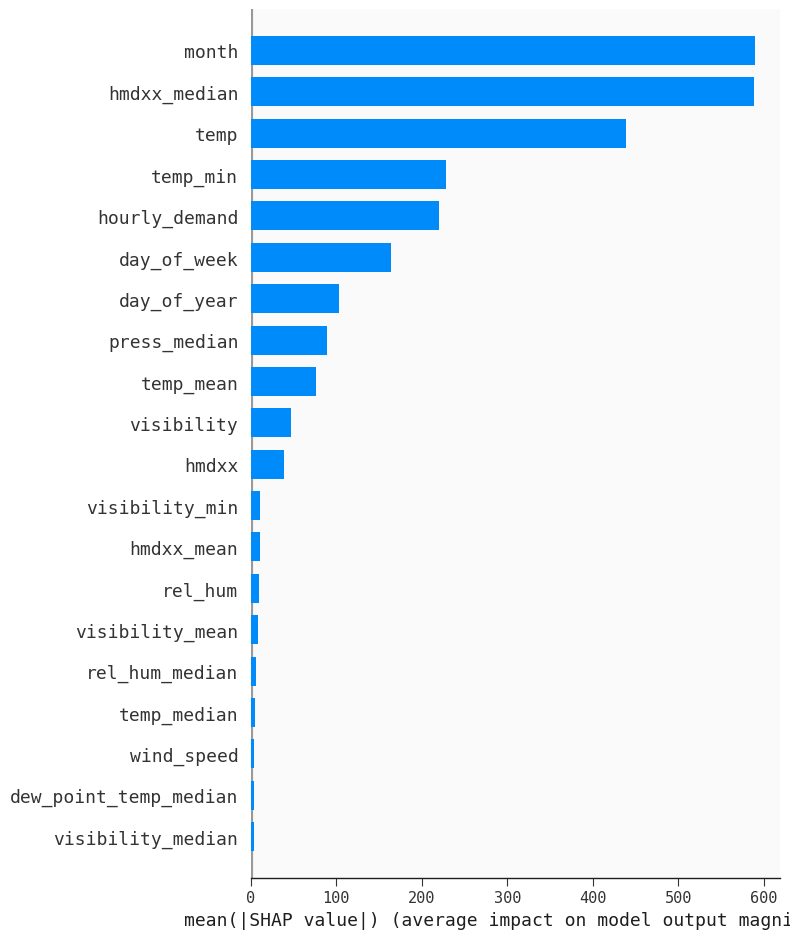

In [397]:
shap.summary_plot(shap_values, x_train, feature_names=features, plot_type="bar")

In [398]:
qtrain, qtest = feyn.tools.split(df_daily, ratio=[0.6, 0.4], random_state=42)
qytest = qtest.loc[:, 'hourly_demand'].values
qytest

array([19286.5       , 19597.5       , 17777.58333333, ...,
       17969.25      , 15876.79166667, 16649.95833333])

In [402]:
# Instantiate a QLattice
ql = feyn.QLattice(random_seed=42)

# Sample and fit models
qmodels = ql.auto_run(
    data=qtest,
    output_name='hourly_demand'
)
best = qmodels[0]

ValueError: Data contains nan or infinite values

In [401]:
problematic_rows = df_daily[df_daily.isna().any(axis=1) | df_daily.isin([np.inf, -np.inf]).any(axis=1)]
print(problematic_rows)

Empty DataFrame
Columns: [temp, dew_point_temp, rel_hum, wind_speed, visibility, press, hourly_demand, hmdxx, temp_min, temp_max, temp_mean, temp_median, dew_point_temp_min, dew_point_temp_max, dew_point_temp_mean, dew_point_temp_median, rel_hum_min, rel_hum_max, rel_hum_mean, rel_hum_median, visibility_min, visibility_max, visibility_mean, visibility_median, press_min, press_max, press_mean, press_median, hmdxx_min, hmdxx_max, hmdxx_mean, hmdxx_median, year, month, day_of_week, day_of_year, week_of_year]
Index: []


In [375]:
# inf_values = df_daily.isin([np.inf, -np.inf])
# nan_values = df.isna()

In [376]:
# print("NaN values:\n", nan_values)
# print("\nInfinite values:\n", inf_values)

NaN values:
       Unnamed: 0  index   temp  dew_point_temp  rel_hum  wind_speed  visibility  press  wind_chill  daily_demand  hmdxx  temp_min  temp_max  temp_mean  temp_median  dew_point_temp_min  dew_point_temp_max  dew_point_temp_mean  dew_point_temp_median  rel_hum_min  rel_hum_max  rel_hum_mean  rel_hum_median  visibility_min  visibility_max  visibility_mean  visibility_median  press_min  press_max  press_mean  press_median  hmdxx_min  hmdxx_max  hmdxx_mean  hmdxx_median  week_of_year  day_of_week   year  month    day  temp_roll_mean  temp_roll_std  rel_hum_roll_mean  rel_hum_roll_std  rel_hum_lag_1  wind_speed_lag_1  rel_hum_lag_2  wind_speed_lag_2  rel_hum_lag_3  wind_speed_lag_3  rel_hum_lag_4  wind_speed_lag_4  rel_hum_lag_5  wind_speed_lag_5  rel_hum_lag_6  wind_speed_lag_6  rel_hum_lag_7  wind_speed_lag_7  temp_humidity_interaction  temp_wind_speed_interaction
0          False  False  False           False    False       False       False  False       False         False  Fa